### Classification task:
- Decide about a good evaluation strategy beside accuracy and justify your choice.
- Apply **all** the classification models you've learned so far. If your model has a scaling parameter(s) use Grid Search to find the best hyper-parameter. Use plots and graphs to help you get a better glimpse of the results.
- Your submission should have at least the following classification models: KNN classification, Logistic Regression, Linear Support Vector Machine, Kerenilzed Support Vector Machine (rbf, poly, and linear), Decision Tree Classifier. 
- Finally, find the best model for the classification dataset and train your model on the entire dataset using the best parameters and predict the target values for the test_set.

## Dataset Information

We have taken our Dataset from UCI Machine learning Dataset Repository.

Link for our datset -- https://archive.ics.uci.edu/ml/datasets/in-vehicle+coupon+recommendation

This data was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver.

## First we Import the libraries that we are going to utilise in our Project
    1.Numpy
    2.Pandas
    3.Matplotlib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Import the dataset using pandas , and then displaying first 5 rows

In [2]:
df = pd.read_csv("in-vehicle-coupon-recommendation.csv", encoding='latin1')
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


Now we look through the dataset to find out missing values in the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

As we do not have enough Null values in our dataset as per demands of the Project. We randomnly replaced non Null value to Null values. For this we also took the precation of not replacing values from our target variable **Y**. And also did not replace values from **car** variable as it had lot's of missing values.
And after this we arrived at 5% missing values for the dataset on which we base our analysis.

In [4]:
y = df['Y']
car = df['car']
df = df.drop(['Y','car'], axis = 1)
np.random.seed(0)
df = df.mask(np.random.random(df.shape) <= 0.05 , try_cast=True)
df['Y'] = y
print(pd.DataFrame(df.isnull().sum()).sum() / (25*12684))
df['car'] = car

0    0.050205
dtype: float64


Now we can observe that almost all the columns in our dataset have missing values(Null values).

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   destination           12007 non-null  object 
 1   passanger             12068 non-null  object 
 2   weather               12038 non-null  object 
 3   temperature           12083 non-null  float64
 4   time                  12059 non-null  object 
 5   coupon                12068 non-null  object 
 6   expiration            12064 non-null  object 
 7   gender                12066 non-null  object 
 8   age                   12048 non-null  object 
 9   maritalStatus         12032 non-null  object 
 10  has_children          12037 non-null  float64
 11  education             12029 non-null  object 
 12  occupation            12025 non-null  object 
 13  income                12044 non-null  object 
 14  Bar                   11976 non-null  object 
 15  CoffeeHouse        

## Exploratory Data Analysis

First we look through all the columns and based on the structure , we define the strategy for tackling missing values, either through Data imputation or Dropping of Column.


We can see that our target variable **Y** is distributed evenly between 0 and 1, thus we can say that it is a Balanced Dataset.

In [6]:
df['Y'].value_counts()

1    7210
0    5474
Name: Y, dtype: int64

We could see that Column **destination** shows that around 5979 persons are at No Urgent Place and around 3000 are both at Home and Work.

In [7]:
df['destination'].value_counts()

No Urgent Place    5940
Home               3074
Work               2993
Name: destination, dtype: int64

We could observe that most of the people drive **Alone** around 6900.

In [8]:
df['passanger'].value_counts()

Alone        6962
Friend(s)    3133
Partner      1023
Kid(s)        950
Name: passanger, dtype: int64

We could observe that the **weather** is mostly "Sunny" in the dataset.

In [9]:
df['weather'].value_counts()

Sunny    9548
Snowy    1338
Rainy    1152
Name: weather, dtype: int64

We could observe that mostly the **temperature** is hot towards 80

In [10]:
df['temperature'].value_counts()

80.0    6192
55.0    3674
30.0    2217
Name: temperature, dtype: int64

The column **time** is evenly distributed among the 5 unique values.

In [11]:
df['time'].value_counts()

6PM     3061
7AM     3011
10AM    2172
2PM     1909
10PM    1906
Name: time, dtype: int64

It could be seen that most of the **coupon** are offered by Coffee House.

In [12]:
df['coupon'].value_counts()

Coffee House             3810
Restaurant(<20)          2651
Carry out & Take away    2282
Bar                      1912
Restaurant(20-50)        1413
Name: coupon, dtype: int64

The **expiration** time of the coupons are evenly divided into two groups of "2h" and "1d".

In [13]:
df['expiration'].value_counts()

1d    6741
2h    5323
Name: expiration, dtype: int64

The demographic ratio of gender could be seen as approximately same.

In [14]:
df['gender'].value_counts()

Female    6193
Male      5873
Name: gender, dtype: int64

It could be observed that the **age** bracket between 21 and 41 are the persons who the survey is targeted at.

In [15]:
df['age'].value_counts()

21         2530
26         2428
31         1933
50plus     1704
36         1248
41         1035
46          648
below21     522
Name: age, dtype: int64

It could be observed that the person's single and with a partner are evenly distributed in the Dataset.

In [16]:
df['maritalStatus'].value_counts()

Married partner      4840
Single               4520
Unmarried partner    2055
Divorced              494
Widowed               123
Name: maritalStatus, dtype: int64

It could be seen most of the persons have children.

In [17]:
df['has_children'].value_counts()

0.0    7064
1.0    4973
Name: has_children, dtype: int64

It could be observed that most of the people have either attended some college with no degree or have a Bachelor's Degree.

In [18]:
df['education'].value_counts()

Some college - no degree                  4158
Bachelors degree                          4087
Graduate degree (Masters or Doctorate)    1760
Associates degree                         1090
High School Graduate                       851
Some High School                            83
Name: education, dtype: int64

The coolumn **Occupation** does not show any insight into the dataset.

In [19]:
df['occupation'].value_counts()

Unemployed                                   1759
Student                                      1501
Computer & Mathematical                      1339
Sales & Related                              1037
Education&Training&Library                    907
Management                                    791
Office & Administrative Support               606
Arts Design Entertainment Sports & Media      601
Business & Financial                          514
Retired                                       463
Food Preparation & Serving Related            284
Healthcare Practitioners & Technical          232
Community & Social Services                   230
Healthcare Support                            226
Legal                                         210
Transportation & Material Moving              208
Architecture & Engineering                    167
Life Physical Social Science                  165
Personal Care & Service                       163
Protective Service                            163


The **income** distribution of the survey sample is evenly distributedd.

In [20]:
df['income'].value_counts()

$25000 - $37499     1925
$12500 - $24999     1733
$37500 - $49999     1708
$100000 or More     1654
$50000 - $62499     1563
Less than $12500     992
$87500 - $99999      844
$75000 - $87499      815
$62500 - $74999      810
Name: income, dtype: int64

The column **car** has lot's of Null values, So we would need to drop this column.

In [21]:
df['car'].value_counts()

Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
Car that is too old to install Onstar :D    21
crossover                                   21
Name: car, dtype: int64

Most of the people have never visited any "Bar" and around 75% have visited less than 1 times.

In [22]:
df['Bar'].value_counts()

never    4964
less1    3302
1~3      2355
4~8      1024
gt8       331
Name: Bar, dtype: int64

It could be seen that the people visiting coffee house is evenly distributed in the dataset.

In [23]:
df['CoffeeHouse'].value_counts()

less1    3226
1~3      3065
never    2824
4~8      1698
gt8      1046
Name: CoffeeHouse, dtype: int64

It could be observed most of the people in the Survey have taken **CarryAway** less than 8 times.

In [24]:
df['CarryAway'].value_counts()

1~3      4440
4~8      4052
less1    1766
gt8      1497
never     145
Name: CarryAway, dtype: int64

It could be observed most of the people in the Survey have been to Restaurant less than 8 times.

In [25]:
df['RestaurantLessThan20'].value_counts()

1~3      5106
4~8      3380
less1    1995
gt8      1224
never     212
Name: RestaurantLessThan20, dtype: int64

In [26]:
df['Restaurant20To50'].value_counts()

less1    5776
1~3      3126
never    2044
4~8       694
gt8       258
Name: Restaurant20To50, dtype: int64

In [27]:
df['toCoupon_GEQ5min'].value_counts()

1.0    11998
Name: toCoupon_GEQ5min, dtype: int64

In [28]:
df['toCoupon_GEQ15min'].value_counts()

1.0    6792
0.0    5285
Name: toCoupon_GEQ15min, dtype: int64

In [29]:
df['toCoupon_GEQ25min'].value_counts()

0.0    10630
1.0     1442
Name: toCoupon_GEQ25min, dtype: int64

We can observe the two columns **direction_same** and **direction_opp** provide the same information so we would be dropping one of the columns.

In [30]:
df['direction_same'].value_counts()

0.0    9478
1.0    2604
Name: direction_same, dtype: int64

In [31]:
df['direction_opp'].value_counts()

1.0    9460
0.0    2589
Name: direction_opp, dtype: int64

## Data Preprocessing

### Mean - Mode imputation

We are imputing the missing values(nan values) in the columns based on criteria as per our EDA.
    1. The missing values in **destination** column is imputed by mode of the **destination** column.
    2. The missing values in **passanger** column is imputed by mode of the **passanger** column.
    3. The missing values in **weather** column is imputed by mode of the **weather** column.
    4. The missing values in **temperature** column is imputed by mode of the **temperature** column for that **weather** group.
    5. The missing values in **time** column is imputed by mode of the **time** column.
    6. The missing values in **coupon** column is imputed by mode of the **coupon** column.
    7. The missing values in **expiration** column is imputed by mode of the **expiration** column for that **time** group.
    8. The missing values in **gender** column is imputed by mode of the **gender** column.
    9. The missing values in **age** column is imputed by mode of the **age** column.
    10. The missing values in **car** column is imputed by mode of the **car** column for that **age** group.
    11. The missing values in **maritalStatus** column is imputed by mode of the **maritalStatus** column for that **age** group.
    12. The missing values in **has_children** column is imputed by mode of the **has_children** column for that **maritalStatus** group.
    13. The missing values in **education** column is imputed by mode of the **education** column for that **age** group.
    14. The missing values in **occupation** column is imputed by mode of the **occupation** column for that **age** group.
    15. The missing values in **income** column is imputed by mode of the **income** column for that **education** group.
    16. The missing values in **Bar** column is imputed by mode of the **Bar** column for that **age** group.
    17. The missing values in **CoffeeHouse** column is imputed by mode of the **CoffeeHouse** column for that **car** group.
    18. The missing values in **CarryAway** column is imputed by mode of the **CarryAway** column for that **car** group.
    19. The missing values in **RestaurantLessThan20** column is imputed by mode of the **RestaurantLessThan20** column for that **car** group.
    20. The missing values in **Restaurant20To50** column is imputed by mode of the **Restaurant20To50** column for that **car** group.
    21. The missing values in **toCoupon_GEQ5min** column is imputed by mode of the **toCoupon_GEQ5min** column for that **car** group.
    22. The missing values in **toCoupon_GEQ15min** column is imputed by mode of the **toCoupon_GEQ15min** column for that **car** group.
    23. The missing values in **toCoupon_GEQ25min** column is imputed by mode of the **toCoupon_GEQ25min** column for that **car** group.
    24. The missing values in **direction_same** column is imputed by mode of the **direction_same** column for that **car** group.
    25. The missing values in **has_children** column is imputed by mode of the **has_children** column for that **maritalStatus** group.

In [32]:
#1
df['destination'] = df['destination'].fillna(df['destination'].mode().iloc[0])
#2
df['passanger'] = df['passanger'].fillna(df['passanger'].mode().iloc[0])
#3
df['weather'] = df['weather'].fillna(df['weather'].mode().iloc[0])
#4
df['temperature'] = df.groupby(['weather'], sort = False)['temperature'].apply(lambda x: x.fillna(x.mean()))
#5
df['time'] = df['time'].fillna(df['time'].mode().iloc[0])
#6
df['coupon'] = df['coupon'].fillna(df['coupon'].mode().iloc[0])
#7
df['expiration'] = df.groupby(['time'], sort = False)['expiration'].apply(lambda x: x.fillna(df['expiration'].mode().iloc[0]))
#8
df['gender'] = df['gender'].fillna(df['gender'].mode().iloc[0])
#9
df['age'] = df['age'].fillna(df['age'].mode().iloc[0])
#10
df['car'] = df.groupby(['age'], sort = False)['car'].apply(lambda x: x.fillna(df['car'].mode().iloc[0]))
#11
df['maritalStatus'] = df.groupby(['age'], sort = False)['maritalStatus'].apply(lambda x: x.fillna(df['maritalStatus'].mode().iloc[0]))
#12
df['has_children'] = df.groupby(['maritalStatus'], sort = False)['has_children'].apply(lambda x: x.fillna(df['has_children'].mode().iloc[0]))
#13
df['education'] = df.groupby(['age'], sort = False)['education'].apply(lambda x: x.fillna(df['education'].mode().iloc[0]))
#14
df['occupation'] = df.groupby(['age'], sort = False)['occupation'].apply(lambda x: x.fillna(df['occupation'].mode().iloc[0]))
#15
df['income'] = df.groupby(['education'], sort = False)['income'].apply(lambda x: x.fillna(df['income'].mode().iloc[0]))
#16
df['Bar'] = df.groupby(['age'], sort = False)['Bar'].apply(lambda x: x.fillna(df['Bar'].mode().iloc[0]))
#17
df['CoffeeHouse'] = df.groupby(['age'], sort = False)['CoffeeHouse'].apply(lambda x: x.fillna(df['CoffeeHouse'].mode().iloc[0]))
#18
df['CarryAway'] = df.groupby(['age'], sort = False)['CarryAway'].apply(lambda x: x.fillna(df['CarryAway'].mode().iloc[0]))
#19
df['RestaurantLessThan20'] = df.groupby(['car'], sort = False)['RestaurantLessThan20'].apply(lambda x: x.fillna(df['RestaurantLessThan20'].mode().iloc[0]))
#20
df['Restaurant20To50'] = df.groupby(['car'], sort = False)['Restaurant20To50'].apply(lambda x: x.fillna(df['Restaurant20To50'].mode().iloc[0]))
#21
df['toCoupon_GEQ5min'] = df.groupby(['car'], sort = False)['toCoupon_GEQ5min'].apply(lambda x: x.fillna(df['toCoupon_GEQ5min'].mode().iloc[0]))
#22
df['toCoupon_GEQ15min'] = df.groupby(['car'], sort = False)['toCoupon_GEQ15min'].apply(lambda x: x.fillna(df['toCoupon_GEQ15min'].mode().iloc[0]))
#23
df['toCoupon_GEQ25min'] = df.groupby(['car'], sort = False)['toCoupon_GEQ25min'].apply(lambda x: x.fillna(df['toCoupon_GEQ25min'].mode().iloc[0]))
#24
df['direction_same'] = df.groupby(['car'], sort = False)['direction_same'].apply(lambda x: x.fillna(df['direction_same'].mode().iloc[0]))
#25
df['has_children'] = df.groupby(['maritalStatus'], sort = False)['has_children'].apply(lambda x: x.fillna(df['has_children'].mode().iloc[0]))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   destination           12684 non-null  object 
 1   passanger             12684 non-null  object 
 2   weather               12684 non-null  object 
 3   temperature           12684 non-null  float64
 4   time                  12684 non-null  object 
 5   coupon                12684 non-null  object 
 6   expiration            12684 non-null  object 
 7   gender                12684 non-null  object 
 8   age                   12684 non-null  object 
 9   maritalStatus         12684 non-null  object 
 10  has_children          12684 non-null  float64
 11  education             12684 non-null  object 
 12  occupation            12684 non-null  object 
 13  income                12684 non-null  object 
 14  Bar                   12684 non-null  object 
 15  CoffeeHouse        

## Dropping variables

We drop the variables **occupation** , **car** and **direction_opp**.

In [33]:
df = df.drop(['direction_opp', 'car','occupation'], axis = 1)

## Transformation of multi-category variables into dummies

We are utilising the concepts of One Hot Vector and converting the Categorical variables into dummies.

A one hot encoding is a representation of categorical variables as binary vectors.
This first requires that the categorical values be mapped to integer values.
Then, each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1.

In [34]:
cols = pd.get_dummies(df['destination'], prefix = 'destination')
df[cols.columns] = cols
df = df.drop(['destination'], axis = 1)
df.columns

Index(['passanger', 'weather', 'temperature', 'time', 'coupon', 'expiration',
       'gender', 'age', 'maritalStatus', 'has_children', 'education', 'income',
       'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20',
       'Restaurant20To50', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min',
       'toCoupon_GEQ25min', 'direction_same', 'Y', 'destination_Home',
       'destination_No Urgent Place', 'destination_Work'],
      dtype='object')

In [35]:
cols = pd.get_dummies(df['passanger'], prefix = 'passanger')
df[cols.columns] = cols
df = df.drop(['passanger'], axis = 1)
df.columns

Index(['weather', 'temperature', 'time', 'coupon', 'expiration', 'gender',
       'age', 'maritalStatus', 'has_children', 'education', 'income', 'Bar',
       'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'Y', 'destination_Home',
       'destination_No Urgent Place', 'destination_Work', 'passanger_Alone',
       'passanger_Friend(s)', 'passanger_Kid(s)', 'passanger_Partner'],
      dtype='object')

In [36]:
cols = pd.get_dummies(df['weather'], prefix = 'weather')
df[cols.columns] = cols
df = df.drop(['weather'], axis = 1)
df.columns

Index(['temperature', 'time', 'coupon', 'expiration', 'gender', 'age',
       'maritalStatus', 'has_children', 'education', 'income', 'Bar',
       'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'Y', 'destination_Home',
       'destination_No Urgent Place', 'destination_Work', 'passanger_Alone',
       'passanger_Friend(s)', 'passanger_Kid(s)', 'passanger_Partner',
       'weather_Rainy', 'weather_Snowy', 'weather_Sunny'],
      dtype='object')

In [37]:
cols = pd.get_dummies(df['time'], prefix = 'time')
df[cols.columns] = cols
df = df.drop(['time'], axis = 1)
df.columns

Index(['temperature', 'coupon', 'expiration', 'gender', 'age', 'maritalStatus',
       'has_children', 'education', 'income', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'Y', 'destination_Home',
       'destination_No Urgent Place', 'destination_Work', 'passanger_Alone',
       'passanger_Friend(s)', 'passanger_Kid(s)', 'passanger_Partner',
       'weather_Rainy', 'weather_Snowy', 'weather_Sunny', 'time_10AM',
       'time_10PM', 'time_2PM', 'time_6PM', 'time_7AM'],
      dtype='object')

In [38]:
cols = pd.get_dummies(df['coupon'], prefix = 'coupon')
df[cols.columns] = cols
df = df.drop(['coupon'], axis = 1)
df.columns

Index(['temperature', 'expiration', 'gender', 'age', 'maritalStatus',
       'has_children', 'education', 'income', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'Y', 'destination_Home',
       'destination_No Urgent Place', 'destination_Work', 'passanger_Alone',
       'passanger_Friend(s)', 'passanger_Kid(s)', 'passanger_Partner',
       'weather_Rainy', 'weather_Snowy', 'weather_Sunny', 'time_10AM',
       'time_10PM', 'time_2PM', 'time_6PM', 'time_7AM', 'coupon_Bar',
       'coupon_Carry out & Take away', 'coupon_Coffee House',
       'coupon_Restaurant(20-50)', 'coupon_Restaurant(<20)'],
      dtype='object')

In [39]:
df['expiration'].replace("2h", 2, inplace = True)
df['expiration'].replace("1d", 24, inplace = True)

In [40]:
df['gender'].replace("Male", 1, inplace = True)
df['gender'].replace("Female", 0, inplace = True)

In [41]:
cols = pd.get_dummies(df['age'], prefix = 'age')
df[cols.columns] = cols
df = df.drop(['age'], axis = 1)
df.columns

Index(['temperature', 'expiration', 'gender', 'maritalStatus', 'has_children',
       'education', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'Y',
       'destination_Home', 'destination_No Urgent Place', 'destination_Work',
       'passanger_Alone', 'passanger_Friend(s)', 'passanger_Kid(s)',
       'passanger_Partner', 'weather_Rainy', 'weather_Snowy', 'weather_Sunny',
       'time_10AM', 'time_10PM', 'time_2PM', 'time_6PM', 'time_7AM',
       'coupon_Bar', 'coupon_Carry out & Take away', 'coupon_Coffee House',
       'coupon_Restaurant(20-50)', 'coupon_Restaurant(<20)', 'age_21',
       'age_26', 'age_31', 'age_36', 'age_41', 'age_46', 'age_50plus',
       'age_below21'],
      dtype='object')

In [42]:
cols = pd.get_dummies(df['maritalStatus'], prefix = 'maritalStatus')
df[cols.columns] = cols
df = df.drop(['maritalStatus'], axis = 1)
df.columns

Index(['temperature', 'expiration', 'gender', 'has_children', 'education',
       'income', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20',
       'Restaurant20To50', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min',
       'toCoupon_GEQ25min', 'direction_same', 'Y', 'destination_Home',
       'destination_No Urgent Place', 'destination_Work', 'passanger_Alone',
       'passanger_Friend(s)', 'passanger_Kid(s)', 'passanger_Partner',
       'weather_Rainy', 'weather_Snowy', 'weather_Sunny', 'time_10AM',
       'time_10PM', 'time_2PM', 'time_6PM', 'time_7AM', 'coupon_Bar',
       'coupon_Carry out & Take away', 'coupon_Coffee House',
       'coupon_Restaurant(20-50)', 'coupon_Restaurant(<20)', 'age_21',
       'age_26', 'age_31', 'age_36', 'age_41', 'age_46', 'age_50plus',
       'age_below21', 'maritalStatus_Divorced',
       'maritalStatus_Married partner', 'maritalStatus_Single',
       'maritalStatus_Unmarried partner', 'maritalStatus_Widowed'],
      dtype='object')

In [43]:
cols = pd.get_dummies(df['education'], prefix = 'education')
df[cols.columns] = cols
df = df.drop(['education'], axis = 1)
df.columns

Index(['temperature', 'expiration', 'gender', 'has_children', 'income', 'Bar',
       'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'Y', 'destination_Home',
       'destination_No Urgent Place', 'destination_Work', 'passanger_Alone',
       'passanger_Friend(s)', 'passanger_Kid(s)', 'passanger_Partner',
       'weather_Rainy', 'weather_Snowy', 'weather_Sunny', 'time_10AM',
       'time_10PM', 'time_2PM', 'time_6PM', 'time_7AM', 'coupon_Bar',
       'coupon_Carry out & Take away', 'coupon_Coffee House',
       'coupon_Restaurant(20-50)', 'coupon_Restaurant(<20)', 'age_21',
       'age_26', 'age_31', 'age_36', 'age_41', 'age_46', 'age_50plus',
       'age_below21', 'maritalStatus_Divorced',
       'maritalStatus_Married partner', 'maritalStatus_Single',
       'maritalStatus_Unmarried partner', 'maritalStatus_Widowed',
       'education_Associates degree', 'education_Ba

In [44]:
cols = pd.get_dummies(df['income'], prefix = 'income')
df[cols.columns] = cols
df = df.drop(['income'], axis = 1)
df.columns

Index(['temperature', 'expiration', 'gender', 'has_children', 'Bar',
       'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'Y', 'destination_Home',
       'destination_No Urgent Place', 'destination_Work', 'passanger_Alone',
       'passanger_Friend(s)', 'passanger_Kid(s)', 'passanger_Partner',
       'weather_Rainy', 'weather_Snowy', 'weather_Sunny', 'time_10AM',
       'time_10PM', 'time_2PM', 'time_6PM', 'time_7AM', 'coupon_Bar',
       'coupon_Carry out & Take away', 'coupon_Coffee House',
       'coupon_Restaurant(20-50)', 'coupon_Restaurant(<20)', 'age_21',
       'age_26', 'age_31', 'age_36', 'age_41', 'age_46', 'age_50plus',
       'age_below21', 'maritalStatus_Divorced',
       'maritalStatus_Married partner', 'maritalStatus_Single',
       'maritalStatus_Unmarried partner', 'maritalStatus_Widowed',
       'education_Associates degree', 'education_Bachelors de

In [45]:
cols = pd.get_dummies(df['Bar'], prefix = 'Bar')
df[cols.columns] = cols
df = df.drop(['Bar'], axis = 1)
df.columns

Index(['temperature', 'expiration', 'gender', 'has_children', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'Y', 'destination_Home',
       'destination_No Urgent Place', 'destination_Work', 'passanger_Alone',
       'passanger_Friend(s)', 'passanger_Kid(s)', 'passanger_Partner',
       'weather_Rainy', 'weather_Snowy', 'weather_Sunny', 'time_10AM',
       'time_10PM', 'time_2PM', 'time_6PM', 'time_7AM', 'coupon_Bar',
       'coupon_Carry out & Take away', 'coupon_Coffee House',
       'coupon_Restaurant(20-50)', 'coupon_Restaurant(<20)', 'age_21',
       'age_26', 'age_31', 'age_36', 'age_41', 'age_46', 'age_50plus',
       'age_below21', 'maritalStatus_Divorced',
       'maritalStatus_Married partner', 'maritalStatus_Single',
       'maritalStatus_Unmarried partner', 'maritalStatus_Widowed',
       'education_Associates degree', 'education_Bachelors degree',


In [46]:
cols = pd.get_dummies(df['CoffeeHouse'], prefix = 'CoffeeHouse')
df[cols.columns] = cols
df = df.drop(['CoffeeHouse'], axis = 1)
df.columns

Index(['temperature', 'expiration', 'gender', 'has_children', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'Y',
       'destination_Home', 'destination_No Urgent Place', 'destination_Work',
       'passanger_Alone', 'passanger_Friend(s)', 'passanger_Kid(s)',
       'passanger_Partner', 'weather_Rainy', 'weather_Snowy', 'weather_Sunny',
       'time_10AM', 'time_10PM', 'time_2PM', 'time_6PM', 'time_7AM',
       'coupon_Bar', 'coupon_Carry out & Take away', 'coupon_Coffee House',
       'coupon_Restaurant(20-50)', 'coupon_Restaurant(<20)', 'age_21',
       'age_26', 'age_31', 'age_36', 'age_41', 'age_46', 'age_50plus',
       'age_below21', 'maritalStatus_Divorced',
       'maritalStatus_Married partner', 'maritalStatus_Single',
       'maritalStatus_Unmarried partner', 'maritalStatus_Widowed',
       'education_Associates degree', 'education_Bachelors degree',
       'education_Grad

In [47]:
cols = pd.get_dummies(df['CarryAway'], prefix = 'CarryAway')
df[cols.columns] = cols
df = df.drop(['CarryAway'], axis = 1)
df.columns

Index(['temperature', 'expiration', 'gender', 'has_children',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'Y',
       'destination_Home', 'destination_No Urgent Place', 'destination_Work',
       'passanger_Alone', 'passanger_Friend(s)', 'passanger_Kid(s)',
       'passanger_Partner', 'weather_Rainy', 'weather_Snowy', 'weather_Sunny',
       'time_10AM', 'time_10PM', 'time_2PM', 'time_6PM', 'time_7AM',
       'coupon_Bar', 'coupon_Carry out & Take away', 'coupon_Coffee House',
       'coupon_Restaurant(20-50)', 'coupon_Restaurant(<20)', 'age_21',
       'age_26', 'age_31', 'age_36', 'age_41', 'age_46', 'age_50plus',
       'age_below21', 'maritalStatus_Divorced',
       'maritalStatus_Married partner', 'maritalStatus_Single',
       'maritalStatus_Unmarried partner', 'maritalStatus_Widowed',
       'education_Associates degree', 'education_Bachelors degree',
       'education_Graduate degree (

In [48]:
cols = pd.get_dummies(df['RestaurantLessThan20'], prefix = 'RestaurantLessThan20')
df[cols.columns] = cols
df = df.drop(['RestaurantLessThan20'], axis = 1)
df.columns

Index(['temperature', 'expiration', 'gender', 'has_children',
       'Restaurant20To50', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min',
       'toCoupon_GEQ25min', 'direction_same', 'Y', 'destination_Home',
       'destination_No Urgent Place', 'destination_Work', 'passanger_Alone',
       'passanger_Friend(s)', 'passanger_Kid(s)', 'passanger_Partner',
       'weather_Rainy', 'weather_Snowy', 'weather_Sunny', 'time_10AM',
       'time_10PM', 'time_2PM', 'time_6PM', 'time_7AM', 'coupon_Bar',
       'coupon_Carry out & Take away', 'coupon_Coffee House',
       'coupon_Restaurant(20-50)', 'coupon_Restaurant(<20)', 'age_21',
       'age_26', 'age_31', 'age_36', 'age_41', 'age_46', 'age_50plus',
       'age_below21', 'maritalStatus_Divorced',
       'maritalStatus_Married partner', 'maritalStatus_Single',
       'maritalStatus_Unmarried partner', 'maritalStatus_Widowed',
       'education_Associates degree', 'education_Bachelors degree',
       'education_Graduate degree (Masters or Doctorate)',


In [49]:
cols = pd.get_dummies(df['Restaurant20To50'], prefix = 'Restaurant20To50')
df[cols.columns] = cols
df = df.drop(['Restaurant20To50'], axis = 1)
df.columns

Index(['temperature', 'expiration', 'gender', 'has_children',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'Y', 'destination_Home',
       'destination_No Urgent Place', 'destination_Work', 'passanger_Alone',
       'passanger_Friend(s)', 'passanger_Kid(s)', 'passanger_Partner',
       'weather_Rainy', 'weather_Snowy', 'weather_Sunny', 'time_10AM',
       'time_10PM', 'time_2PM', 'time_6PM', 'time_7AM', 'coupon_Bar',
       'coupon_Carry out & Take away', 'coupon_Coffee House',
       'coupon_Restaurant(20-50)', 'coupon_Restaurant(<20)', 'age_21',
       'age_26', 'age_31', 'age_36', 'age_41', 'age_46', 'age_50plus',
       'age_below21', 'maritalStatus_Divorced',
       'maritalStatus_Married partner', 'maritalStatus_Single',
       'maritalStatus_Unmarried partner', 'maritalStatus_Widowed',
       'education_Associates degree', 'education_Bachelors degree',
       'education_Graduate degree (Masters or Doctorate)',
       'education_Hi

## Model Creation and Evaluation

In [50]:
df.head()

,temperature,expiration,gender,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Y,destination_Home,...,RestaurantLessThan20_1~3,RestaurantLessThan20_4~8,RestaurantLessThan20_gt8,RestaurantLessThan20_less1,RestaurantLessThan20_never,Restaurant20To50_1~3,Restaurant20To50_4~8,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never
0,55.00000,24,0,1.0,1.0,0.0,0.0,0.0,1,0,...,0,1,0,0,0,1,0,0,0,0
1,80.00000,2,0,0.0,1.0,0.0,0.0,0.0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,80.00000,2,0,1.0,1.0,1.0,0.0,0.0,1,0,...,0,1,0,0,0,1,0,0,0,0
3,68.55133,2,0,1.0,1.0,1.0,0.0,0.0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,68.55133,24,0,1.0,1.0,1.0,0.0,0.0,0,0,...,0,1,0,0,0,1,0,0,0,0


We split our dataframe into two parts the target variable **y** and the predictors **X**.

In [51]:
y = df['Y']
X = df.drop(['Y'], axis = 1)

We are using train_test_split function of Scikitlearn library to split our dataset into train and test.

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

First looking at the Scatter Matrix of first 5 columns to get a snapshot of the relationship between the variables.

/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:81: UserWarning: Attempting to set identical bottom == top == 1.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:71: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc24dac1f10>,
      dtype=object)

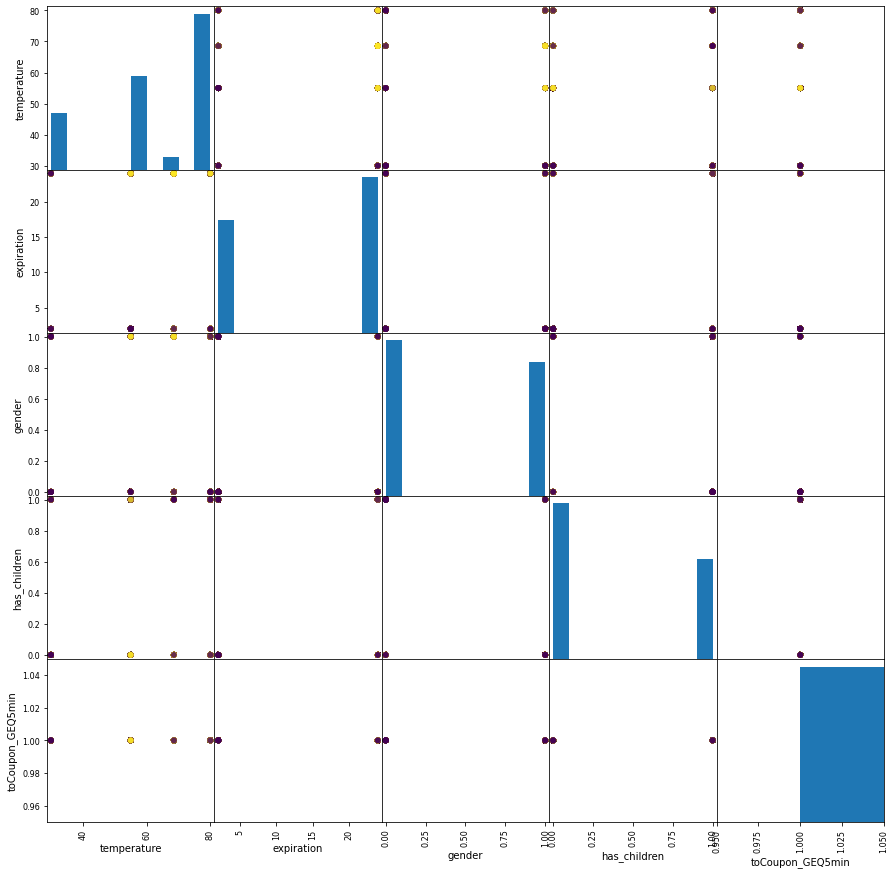

In [53]:
%matplotlib inline
from pandas.plotting import scatter_matrix

attributes = df.columns[:5]
scatter_matrix(X[attributes], figsize = (15,15), c = y, alpha = 0.8, marker = 'O')

Then we Scale the dataset using MinMaxScaler method from ScikitLearn Library.

This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
count,9513.000000,9513.000000,9513.000000,9513.000000,9513.0,9513.000000,9513.000000,9513.000000,9513.000000,9513.000000,...,9513.000000,9513.000000,9513.000000,9513.000000,9513.000000,9513.000000,9513.000000,9513.000000,9513.000000,9513.000000
mean,0.668803,0.578261,0.464207,0.388311,0.0,0.583622,0.114054,0.202775,0.241880,0.521392,...,0.460212,0.268264,0.097340,0.157048,0.017134,0.246084,0.055923,0.020183,0.519184,0.158625
std,0.376278,0.493863,0.498743,0.487392,0.0,0.492984,0.317894,0.402088,0.428244,0.499568,...,0.498441,0.443079,0.296436,0.363865,0.129779,0.430751,0.229786,0.140633,0.499658,0.365345
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.771027,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### K Neighbours Classifier

The k-neighbors classification in KNeighborsClassifier is the most commonly used technique. The optimal choice of the value k is highly data-dependent: in general a larger k suppresses the effects of noise, but makes the classification boundaries less distinct.

We can observe from the graph that the optimal value of k where both train and test score become constant is around 5.

So the value of train score and test at value of k=5 is 79.09 and 67.61 respectively.

In [55]:
from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []

for k in range(1,10):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))

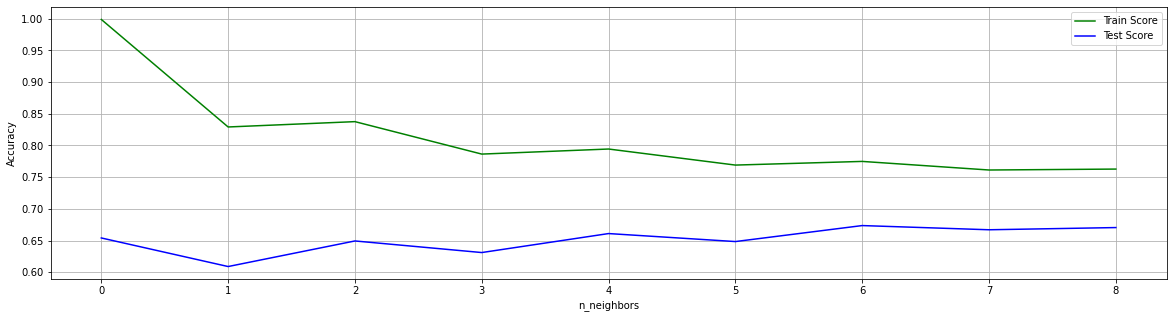

In [56]:
x_axis = range(1,10)
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.xticks(x_axis, np.arange(10))
plt.grid()
plt.legend()

In [57]:
knn = KNeighborsClassifier(5)
knn.fit(X_train, y_train)
print('Train score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test score: {:.4f}'.format(knn.score(X_test, y_test)))

Train score: 0.7944
Test score: 0.6610


In [58]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 81 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   temperature                                       12684 non-null  float64
 1   expiration                                        12684 non-null  int64  
 2   gender                                            12684 non-null  int64  
 3   has_children                                      12684 non-null  float64
 4   toCoupon_GEQ5min                                  12684 non-null  float64
 5   toCoupon_GEQ15min                                 12684 non-null  float64
 6   toCoupon_GEQ25min                                 12684 non-null  float64
 7   direction_same                                    12684 non-null  float64
 8   destination_Home                                  12684 non-null  uint8  
 9   destination_No Ur

Text(0, 0.5, 'temperature')

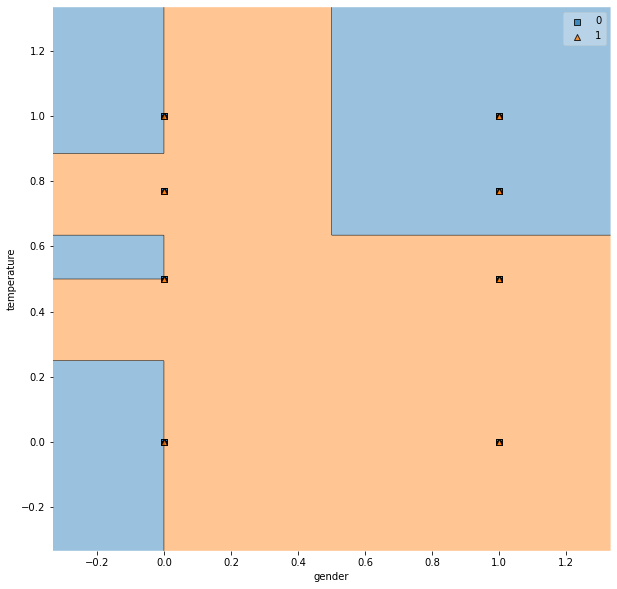

In [59]:
%matplotlib inline

from mlxtend.plotting import plot_decision_regions

fig = plt.figure(figsize=(10, 10))
plt.xlim(0, 1)
plt.ylim(0,0.8)
X_b = X_train[:1000,[2,0]]
y_b = np.array(y_train[:1000])

knn = KNeighborsClassifier(5)
knn.fit(X_b, y_b) 

plot_decision_regions(X_b, y_b, clf = knn, zoom_factor = 3)
plt.xlabel('gender')
plt.ylabel('temperature')

## Logistic Regression

We used different combination of the hyperparameter's C , penalty function and solver to arrive at an optimum point.

It could be seen from the plot below that for the value of C at 0.01 there is a knee bend and after the scores begin to e constant. And for penalty function l2 it shows a better model as the difference between train and test score is less.

In [60]:
from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c, solver = 'liblinear', max_iter = 500)
    log_l2 = LogisticRegression(penalty = 'l2', C = c, solver = 'lbfgs', max_iter = 500)
    log_l1.fit(X_train, y_train)
    log_l2.fit(X_train, y_train)
    train_score_l1.append(log_l1.score(X_train, y_train))
    train_score_l2.append(log_l2.score(X_train, y_train))
    test_score_l1.append(log_l1.score(X_test, y_test))
    test_score_l2.append(log_l2.score(X_test, y_test))

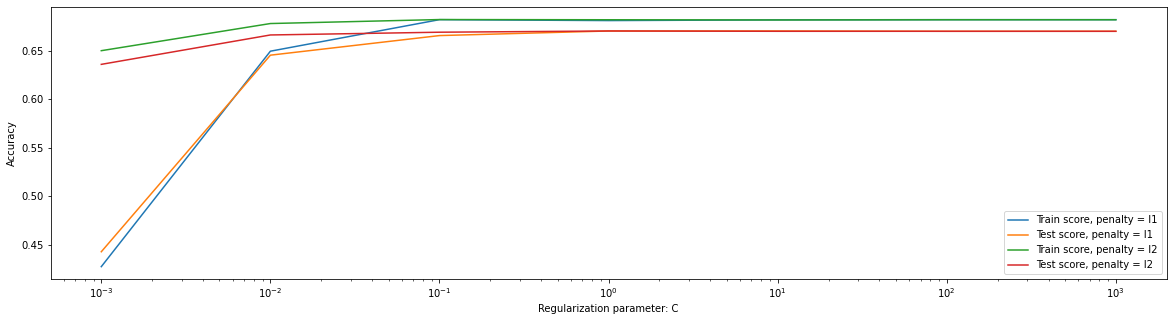

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

In [62]:
%matplotlib inline

from mlxtend.plotting import plot_decision_regions

X_b = X_train[200:, [7,23]]
y_b = y_train[200:]

lreg = LogisticRegression(C = 0.01, penalty = 'l2')
lreg.fit(X_b, y_b) 

LogisticRegression(C=0.01)

Text(0, 0.5, 'temperature')

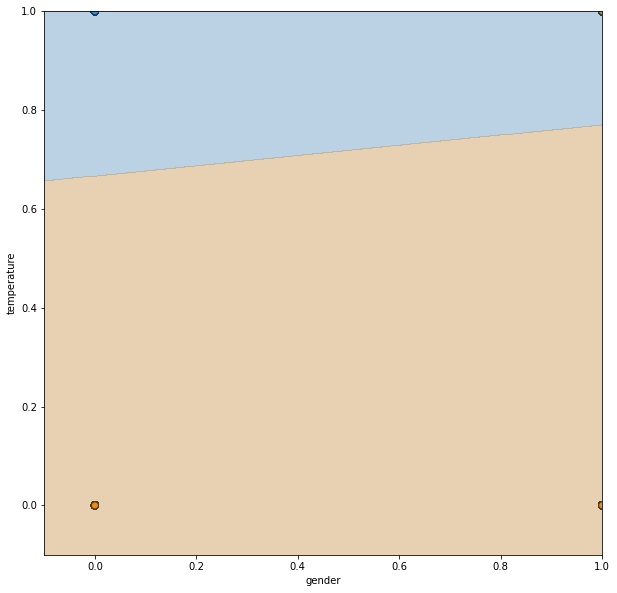

In [63]:
import matplotlib 
import numpy as np

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["dodgerblue", "darkorange"])    

plt.subplots(figsize = (10,10))
xaxis = np.linspace(0,1, 100)
plt.scatter(X_b[:,0], X_b[:,1], c = y_b, cmap= cmap, s = 50, edgecolor = 'k')


x1_min, x1_max = X_b[:, 0].min()-1, X_b[:, 0].max() + 1
x2_min, x2_max = X_b[:, 1].min()-1, X_b[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.001), np.arange(x2_min, x2_max, 0.001))
Z = lreg.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, levels = 1, alpha = 0.4, cmap=cmap)
plt.xlim(-0.1,1)
plt.ylim(-0.1,1)
plt.xlabel('gender')
plt.ylabel('temperature')

Text(0.5, 1.0, 'Logistic Regression with post-preocessing of results')

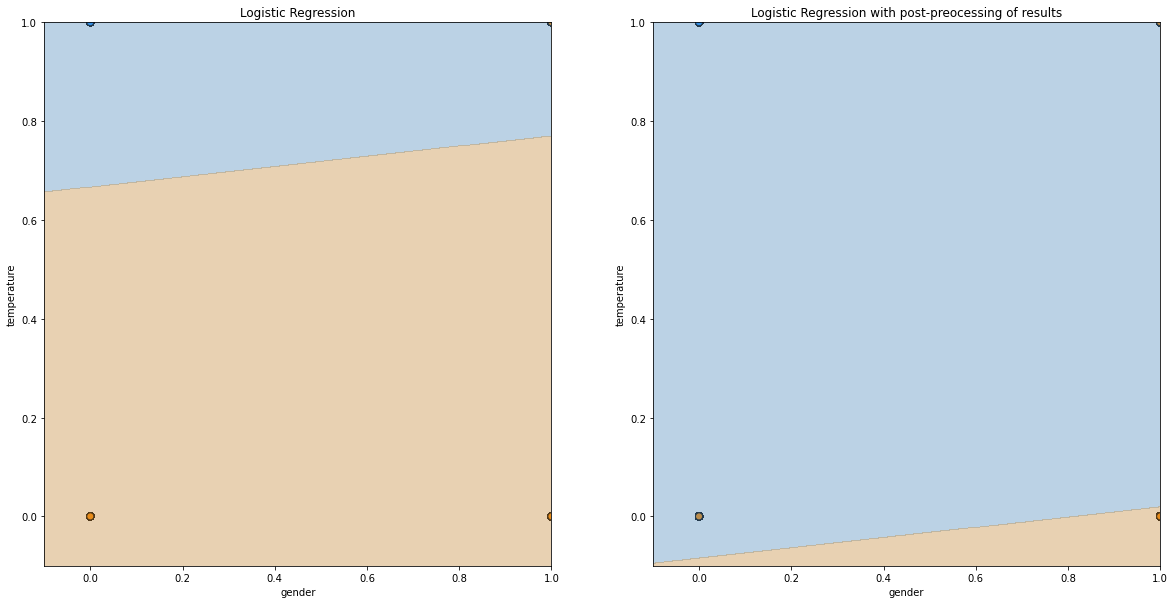

In [64]:
import matplotlib 

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["dodgerblue", "darkorange"])    

plt.subplots(figsize = (20,10))
xaxis = np.linspace(0,1, 100)

plt.subplot(1,2,1)
plt.scatter(X_b[:,0], X_b[:,1], c = y_b, cmap= cmap, s = 50, edgecolor = 'k')
x1_min, x1_max = X_b[:, 0].min()-1, X_b[:, 0].max() + 1
x2_min, x2_max = X_b[:, 1].min()-1, X_b[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.001), np.arange(x2_min, x2_max, 0.001))
Z = lreg.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, levels = 1, alpha = 0.4, cmap=cmap)
plt.xlim(-0.1,1)
plt.ylim(-0.1,1)
plt.xlabel('gender')
plt.ylabel('temperature')
plt.title('Logistic Regression')

plt.subplot(1,2,2)
plt.scatter(X_b[:,0], X_b[:,1], c = y_b, cmap= cmap, s = 50, edgecolor = 'k')
x1_min, x1_max = X_b[:, 0].min()-1, X_b[:, 0].max() + 1
x2_min, x2_max = X_b[:, 1].min()-1, X_b[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.001), np.arange(x2_min, x2_max, 0.001))
Z = lreg.predict_proba(np.array([xx1.ravel(), xx2.ravel()]).T)[:,1]
Z = Z.reshape(xx1.shape)
Z = np.where(Z <= 0.6, 0, 1)
plt.contourf(xx1, xx2, Z, levels = 1, alpha = 0.4, cmap=cmap)
plt.xlim(-0.1,1)
plt.ylim(-0.1,1)
plt.xlabel('gender')
plt.ylabel('temperature')
plt.title('Logistic Regression with post-preocessing of results')

### LinearSVC

    1. Firstly we checked the affect of coef0 on the model , and we could see that when coef0 = 1 , the model predicts more accurately.
    2. Then we checked the affect of different kernels (Linear SVC, SVC with linear kernel, SVC with rbf kernel and SVC with polynomial degree 3 kernel). It could be seen that kernel does have an affect and rbf kernel explains the behavior in dataset most accurately.
    3. Next we saw the affect of hyperparameter C on the model ,it could be observerd that as we increase the value of C the curve fiits better.
    4. Lastly we saw the affect of hyperparameter gamma on the model ,it could be observerd that as we increase the value of gamma the curve fits better.

In [65]:
%matplotlib inline

from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import load_iris
from sklearn.svm import LinearSVC

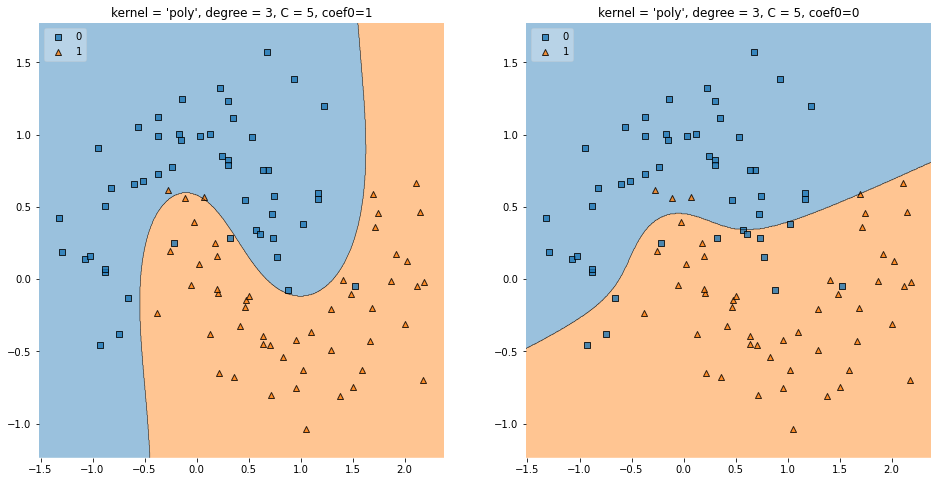

In [66]:
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(1, 2)

data = make_moons(n_samples= 100, noise = 0.3, random_state = 0)
X = data[0]
y = data[1]

clf1 = SVC(kernel = 'poly', degree = 3, C = 5, coef0=1)
clf1.fit(X,y)

clf2 = SVC(kernel = 'poly', degree = 3, C = 5, coef0=0)
clf2.fit(X,y)

fig = plt.figure(figsize=(16,8))

labels = ["kernel = 'poly', degree = 3, C = 5, coef0=1", "kernel = 'poly', degree = 3, C = 5, coef0=0"]
for clf, lab, grd in zip([clf1, clf2],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2, zoom_factor=5)
    plt.title(lab)

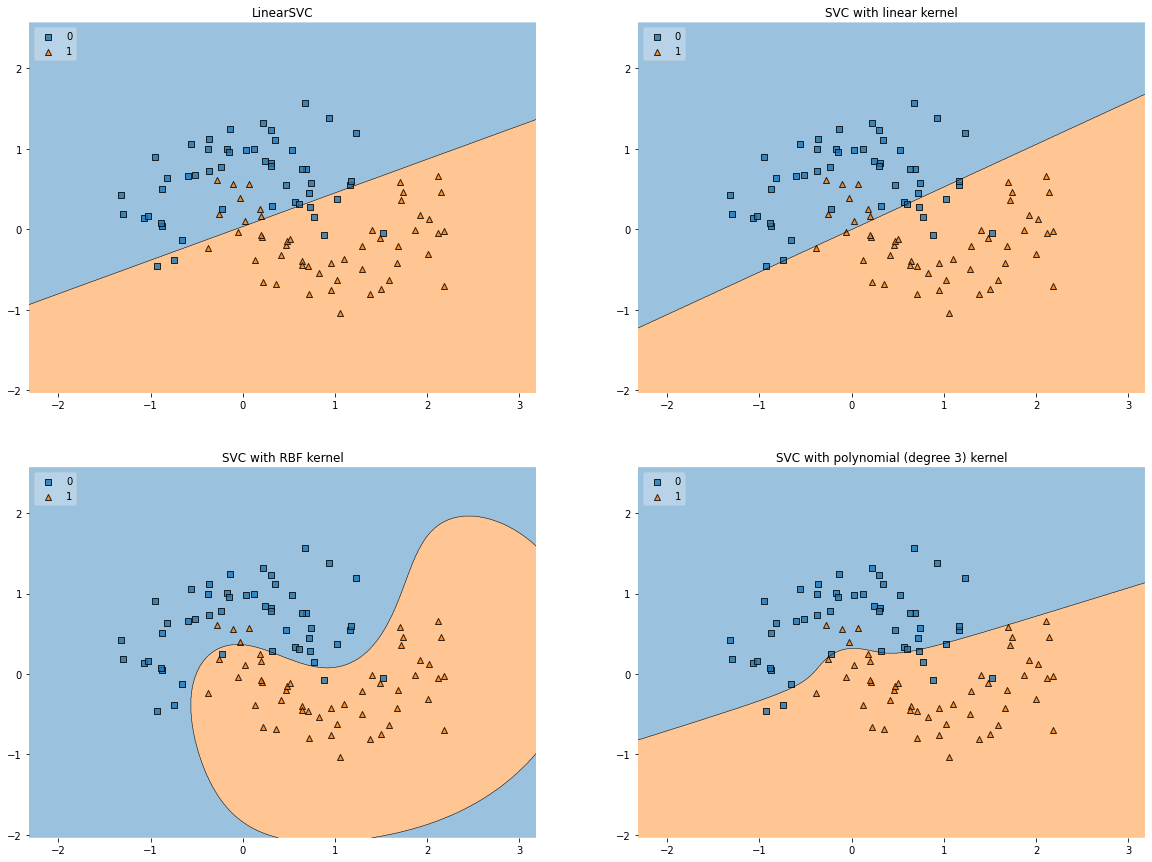

In [67]:
%matplotlib inline

from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
import matplotlib.gridspec as gridspec
import itertools

C = 1
clf1 = LinearSVC(C=C)
clf2 = SVC(kernel='linear', C=C)
clf3 = SVC(kernel='rbf', gamma=0.7, C=C)
clf4 = SVC(kernel='poly', degree=3, C=C)


gs = gridspec.GridSpec(2, 2)
fig, ax = plt.subplots(figsize=(20, 15))

labels = ['LinearSVC',
          'SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1],
                         repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y,
                                clf=clf, legend=2)
    plt.title(lab)
    handles, labels = ax.get_legend_handles_labels()

    


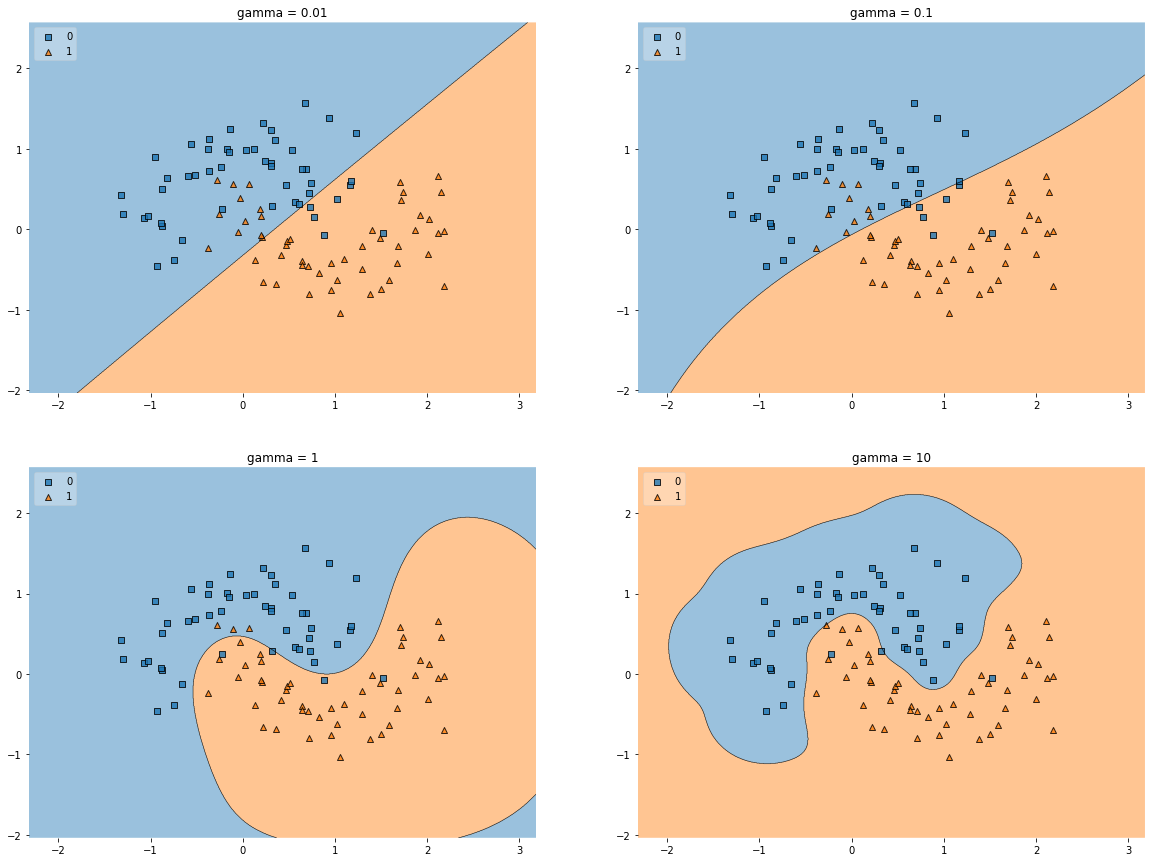

In [68]:
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC


C = 1
clf1 = SVC(kernel='rbf', gamma=0.01, C=C)
clf2 = SVC(kernel='rbf', gamma=0.1, C=C)
clf3 = SVC(kernel='rbf', gamma=1, C=C)
clf4 = SVC(kernel='rbf', gamma=10, C=C)


models = (SVC(kernel='rbf', gamma=0.01, C=1),
         SVC(kernel = 'rbf', gamma = 0.1, C = 1),
         SVC(kernel = 'rbf', gamma = 1, C = 1),
         SVC(kernel = 'rbf', gamma = 10, C = 1))


gs = gridspec.GridSpec(2, 2)
fig, ax = plt.subplots(figsize=(20, 15))

labels = ['gamma = 0.01',
          'gamma = 0.1',
          'gamma = 1',
          'gamma = 10']

for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1],
                         repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y,
                                clf=clf, legend=2)
    plt.title(lab)
    handles, labels = ax.get_legend_handles_labels()
    

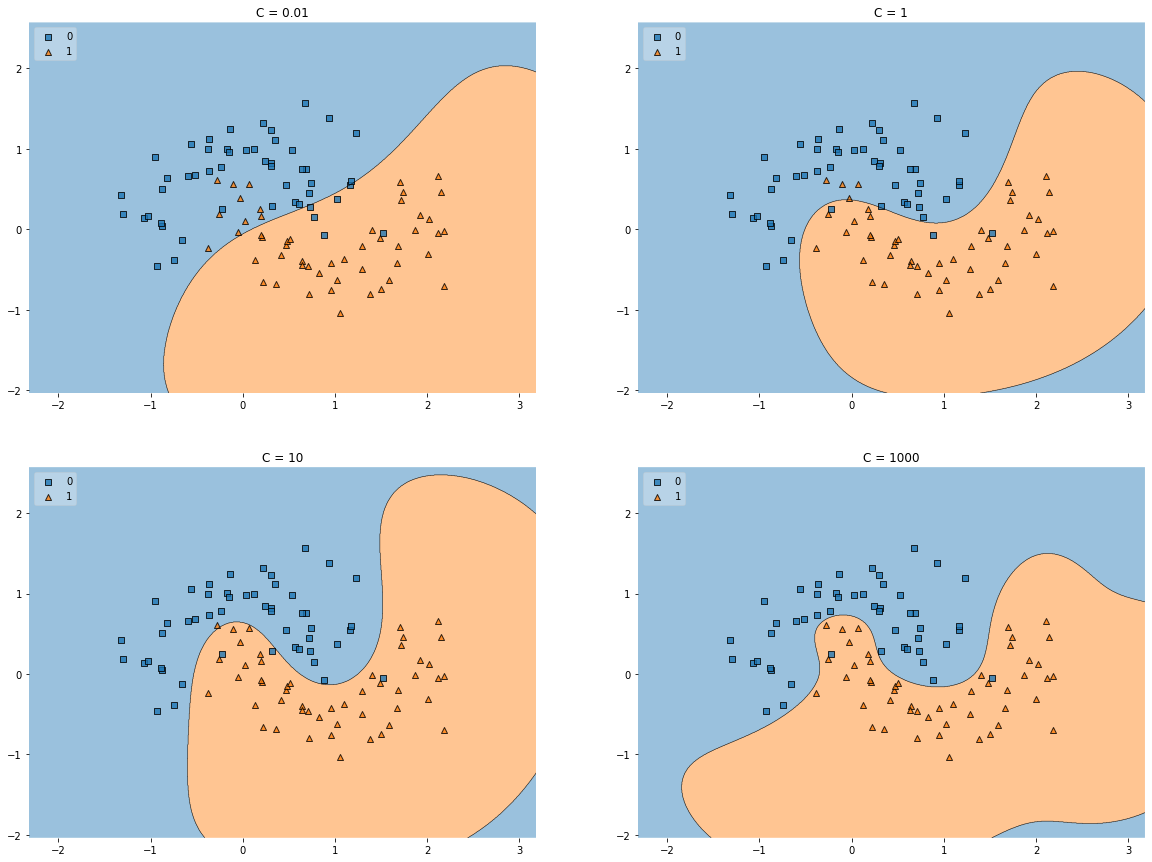

In [69]:
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC

gamma = 0.7
clf1 = SVC(kernel='rbf', gamma=gamma, C=0.01)
clf2 = SVC(kernel='rbf', gamma=gamma, C=1)
clf3 = SVC(kernel='rbf', gamma=gamma, C=10)
clf4 = SVC(kernel='rbf', gamma=gamma, C=1000)

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(20, 15))

labels = ['C = 0.01',
          'C = 1',
          'C = 10',
          'C = 1000']

for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1],
                         repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y,
                                clf=clf, legend=2)
    plt.title(lab)
    handles, labels = ax.get_legend_handles_labels()

### Decision Tree Classifier

We can observe that a default Decision Tree creates a model that has a very high train score of 0.99.
So we adjust it by providing the value of max_depth = 5 , which provides us a better model with train score and test score of 0.666 , 0.663 respectively.

In [70]:
%matplotlib notebook
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

dtree = DecisionTreeClassifier(random_state=0)

dtree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

Accuracy on training set: 0.999
Accuracy on test set: 0.662


In [71]:
dtree = DecisionTreeClassifier(max_depth=5, random_state=0)
dtree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

Accuracy on training set: 0.668
Accuracy on test set: 0.665


In [72]:
import matplotlib.pyplot as plt
import numpy as np

Based on the Decision Tree model above , we try to find the importance of features and we could see that the features of higher importance are:

    1.CoffeeHouse_less1
    2.Coupon_Restaurant(20-50)
    3.Coupon_Bar
    4.passanger_Alone
    5.toCoupon_GEQ25min
    6.expiration

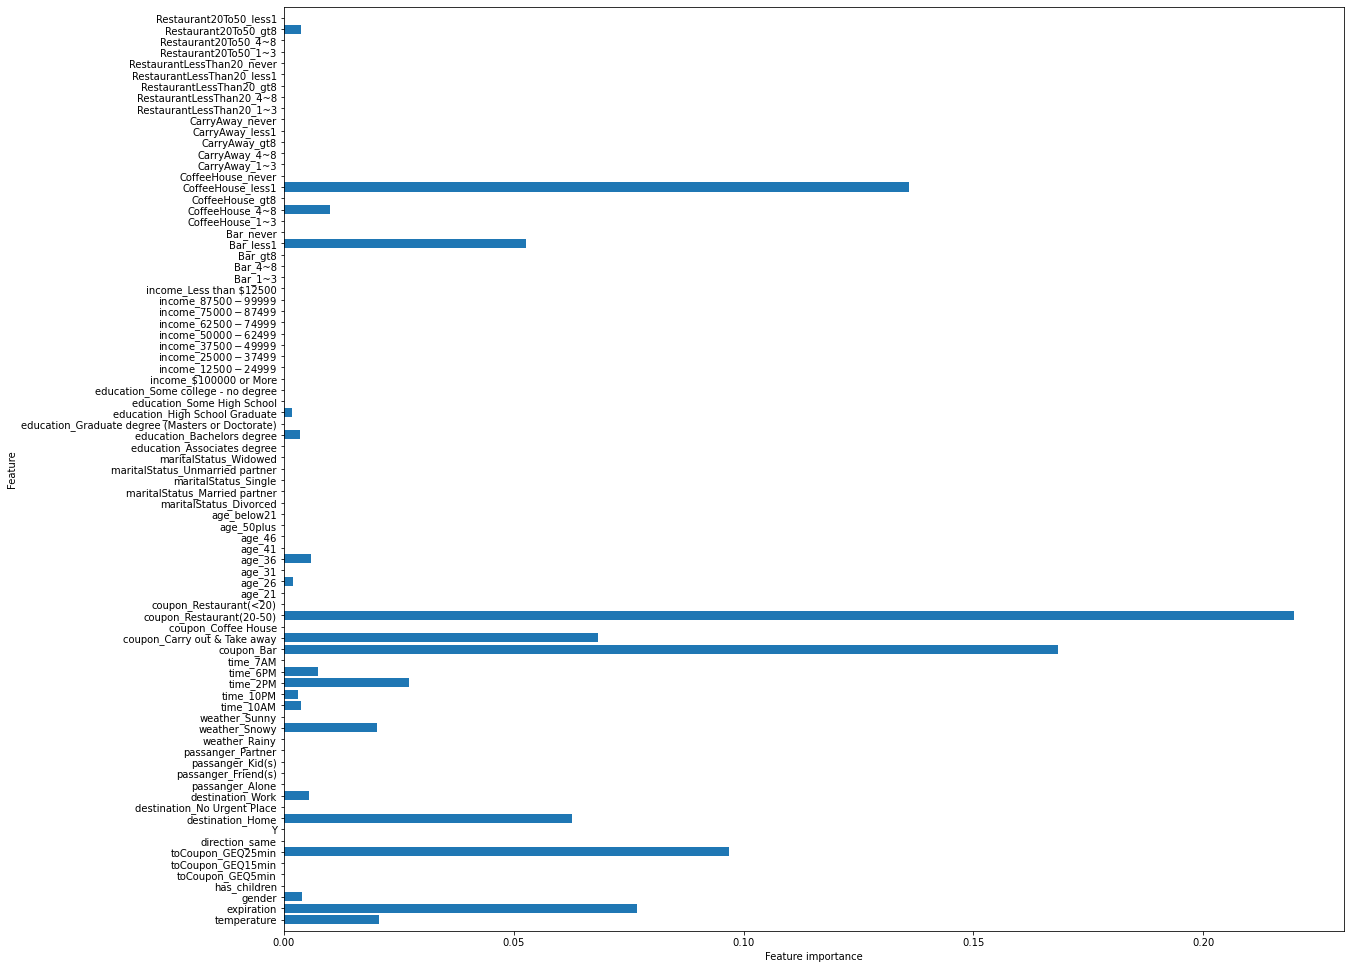

In [73]:
%matplotlib inline

def plot_feature_importances_cancer(model):
    fig, ax = plt.subplots(figsize=(19, 17))
    n_features = 81
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), df.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(dtree)

### Precision Recall Curve

We can observe that threshold zero and best threshold.

It could seen that the curve suggests to decrease the recall value and maintaining the same precision.

When we compute it by changing the threshold from default to 0.377 as suggested by the precision recall curve , we achieve a precision value of 0.85 and a recall value of 0.46 . Which is a more desirable model.

In [74]:
from sklearn.metrics import precision_recall_curve
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

svc = SVC(kernel = 'rbf', C = 0.1, gamma = 10, random_state = 0)
svc.fit(X_train, y_train)

SVC(C=0.1, gamma=10, random_state=0)

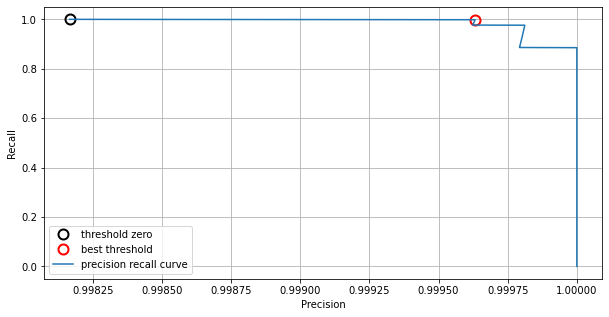

In [75]:
%matplotlib inline

plt.subplots(figsize = (10,5))
precision, recall, thresholds = precision_recall_curve(y_train, svc.decision_function(X_train))

close_zero = np.argmin(np.abs(thresholds))

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision[19], recall[19], 'o', markersize=10,
         label="best threshold", fillstyle="none", c='r', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.grid()

In [76]:
from sklearn.metrics import precision_score, recall_score

y_predict = np.where(svc.decision_function(X_test) >= 0, 1, 0)
print('Before the post processing: ')
print('Precision: ', precision_score(y_test, y_predict))
print('Recall: ', recall_score(y_test, y_predict))

Before the post processing: 
Precision:  0.5569221065909807
Recall:  1.0


In [77]:
np.argmin(np.abs(precision - 0.95))

0

In [78]:
from sklearn.metrics import precision_score, recall_score

y_predict = np.where(svc.decision_function(X_test) >= thresholds[20], 1, 0)
print('After the post processing: ')
print('Precision: ', precision_score(y_test, y_predict))
print('Recall: ', recall_score(y_test, y_predict))

After the post processing: 
Precision:  0.8181818181818182
Recall:  0.005096262740656852


### roc_auc_score


We can observe in this plot that SVC and Random Forest provide similar f1 score values , which means both models explain the variance in Y in similar manner.

But as we know tham Random forest algorithm is more cost intensive so we proceed our analysis with SVC.
As SVC can give us the comparable level of accuracy as Random Forest.

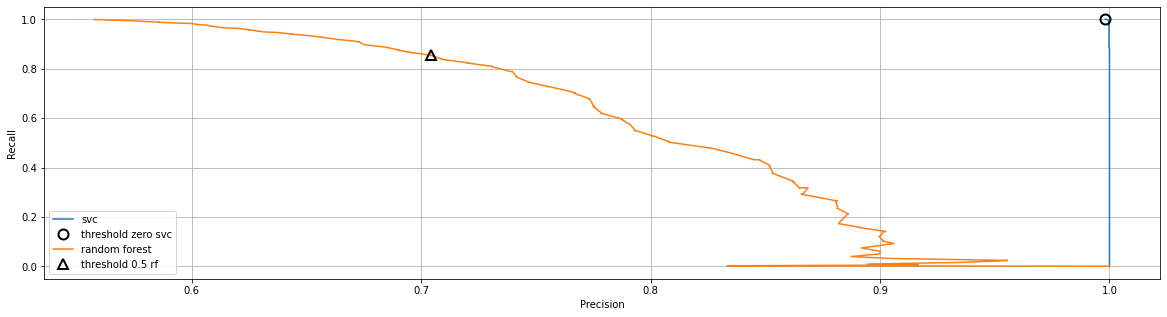

In [79]:
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

# RandomForestClassifier has predict_proba, but not decision_function
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.subplots(figsize = (20,5))
plt.plot(precision, recall, label="svc")

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero svc", fillstyle="none", c='k', mew=2)

plt.plot(precision_rf, recall_rf, label="random forest")

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c='k',
         markersize=10, label="threshold 0.5 rf", fillstyle="none", mew=2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.grid()

In [80]:
print("f1_score of random forest: {:.3f}".format(f1_score(y_test, rf.predict(X_test))))

print("f1_score of svc: {:.3f}".format(f1_score(y_test, svc.predict(X_test))))

f1_score of random forest: 0.769
f1_score of svc: 0.715


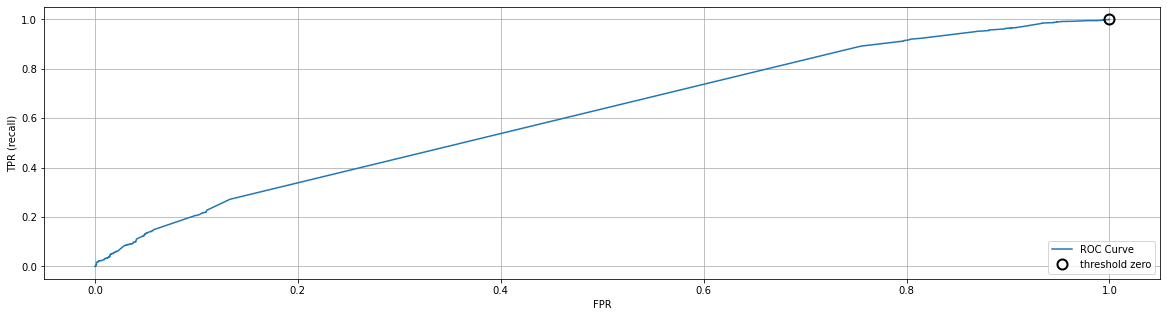

In [81]:
%matplotlib inline 

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))

plt.subplots(figsize = (20,5))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)
plt.grid()

gamma = 1.00  accuracy = 0.58  AUC = 0.70
gamma = 0.50  accuracy = 0.68  AUC = 0.77
gamma = 0.10  accuracy = 0.73  AUC = 0.80
gamma = 0.01  accuracy = 0.68  AUC = 0.74


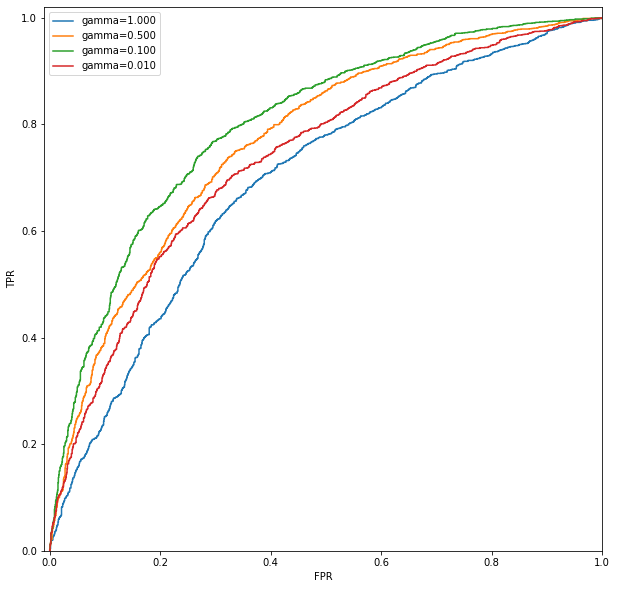

In [82]:
%matplotlib inline

from sklearn.metrics import roc_auc_score


plt.subplots(figsize = (10,10))

for gamma in [1, 0.5, 0.1, 0.01]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test , svc.decision_function(X_test))
    print("gamma = {:.2f}  accuracy = {:.2f}  AUC = {:.2f}".format(
        gamma, accuracy, auc))
    plt.plot(fpr, tpr, label="gamma={:.3f}".format(gamma))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc="best")

## Grid Search

We could observe that Naive search has a Best score of 0.73 and value of C = 1 and gamma = 0.1.

When we further proceed using validation technique, it has a Best Score of 0.92 and value of C = 100 and gamma = 10.

Then on working with Cross Validation , using cv = 5 , we arrive at a Best Score of 0.92 and value of C = 100 and gamma = 10.

### Naive

In [83]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

print("Size of training set: {}   size of test set: {}".format(X_train.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the test set
        score = svm.score(X_test, y_test)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Size of training set: 9513   size of test set: 3171
Best score: 0.73
Best parameters: {'C': 1, 'gamma': 0.1}


In [84]:
from sklearn.svm import SVC

# split data into train+validation set and test set
X_trainval_orig, X_test_orig, y_trainval, y_test = train_test_split(X, y, random_state=0)

# split train+validation set into training and validation sets
X_train_orig, X_valid_orig, y_train, y_valid = train_test_split(X_trainval_orig, y_trainval, random_state=1)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_orig)
X_trainval = scaler.transform(X_trainval_orig)
X_valid = scaler.transform(X_valid_orig)
X_test = scaler.transform(X_test_orig)

print("Size of training set: {}   size of validation set: {}   size of test set:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the validation set
        score = svm.score(X_valid, y_valid)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

# rebuild a model on the combined training and validation set,
# and evaluate it on the test set
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

Size of training set: 56   size of validation set: 19   size of test set: 25

Best score on validation set: 0.95
Best parameters:  {'C': 100, 'gamma': 10}
Test set score with best parameters: 0.92


## Grid Search with Cross Validation

In [85]:
import numpy as np
from sklearn.model_selection import cross_val_score

scaler = MinMaxScaler()
X_trainval = scaler.fit_transform(X_trainval_orig)
X_test = scaler.transform(X_test_orig)

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters,
        # train an SVC
        svm = SVC(random_state= 0,gamma=gamma, C=C)
        # perform cross-validation
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        # compute mean cross-validation accuracy
        score = np.mean(scores)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
            
# rebuild a model on the combined training and validation set
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

Best score on validation set: 0.95
Best parameters:  {'C': 100, 'gamma': 10}
Test set score with best parameters: 0.92


### Recommended Model

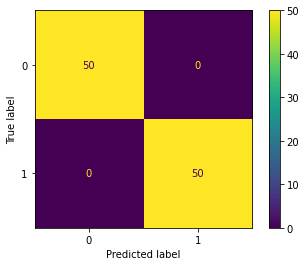

In [86]:
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_confusion_matrix
svm = SVC(random_state= 0,gamma=10, C=100)
svm.fit(X,y)
plot_confusion_matrix(svm, X, y)

### Summary

We can observe that the best model we arrive at is an SVC model with value of hyperparameters to be C = 100 and gamma = 10.
This model was able to provide a validation score of 0.95 and test score of 0.92. Showing that the model is predicting very well for unseen values.
